In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("ex2data1.txt", header=None, names = ["Exam1", "Exam2", "Admitted"])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


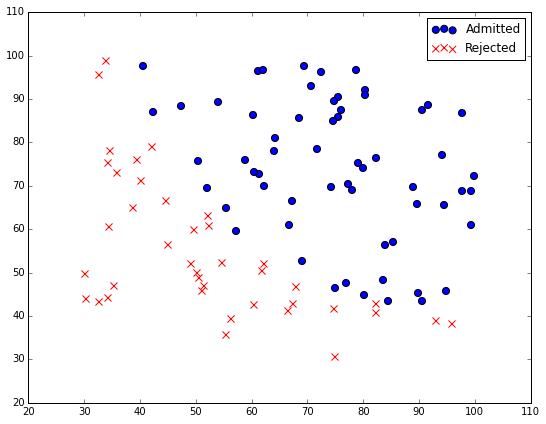

In [14]:
#Plot comparing Admitted vs. rejected applicants
positive = data[data["Admitted"].isin([1])] #subsetting admitted vs. rejected
negative = data[data["Admitted"].isin([0])]
plt.figure(figsize=(9, 7))
plt.scatter(positive.Exam1, positive.Exam2, s = 50, c="b", marker="o", label="Admitted")
plt.scatter(negative.Exam1, negative.Exam2, s= 50, c="r", marker="x", label="Rejected")
plt.legend()

In [15]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

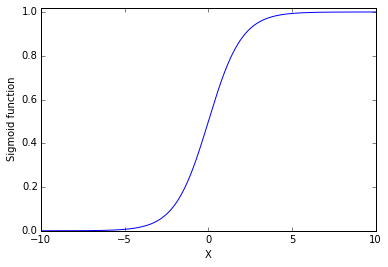

In [18]:
#Graph to check sigmoid function implementation
nums = np.arange(-10, 10, 0.01)
plt.plot(nums, sigmoid(nums))
plt.ylim(0, 1.02)
plt.xlabel("X")
plt.ylabel("Sigmoid function")

In [30]:
def cost(theta, X, y):
    X = np.matrix(X) #convert to numpy matrices
    y = np.matrix(y)
    theta = np.matrix(theta)
    m = float(len(y)) #number of observations
    first = np.multiply(-y, np.log(sigmoid(np.dot(X, theta.T))))
    second = np.multiply(1 - y, np.log(1 - sigmoid(np.dot(X, theta.T))))
    return 1.0 / m * np.sum(first - second)

In [20]:
data.insert(0, "Ones", 1)
data.head()

,Ones,Exam1,Exam2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [21]:
numcols = data.shape[1]
X = data.iloc[:, 0:numcols - 1]
y = data.iloc[:, numcols-1:numcols]
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [22]:
X.shape, y.shape, theta.shape

((100L, 3L), (100L, 1L), (3L,))

In [31]:
cost(theta, X, y)

0.69314718055994529

In [32]:
def gradient(theta, X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    m = float(len(y)) #total number of observations
    numparams = int(theta.ravel().shape[1])  #determine number of parameters
    grad = np.zeros(numparams)
    errors = sigmoid(np.dot(X, theta.T)) - y #errors
    
    for i in range(numparams):
        grad[i] = 1.0/m * np.sum(np.multiply(errors, X[:, i]))
    return grad

In [33]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [27]:
import scipy.optimize as opt

In [34]:
result = opt.fmin_tnc(func = cost, x0 = theta, fprime=gradient, args=(X, y))
result

(array([-25.16131866,   0.20623159,   0.20147149]), 36, 0)

In [35]:
def predict(theta, X):
    probs = sigmoid(np.dot(X, theta.T))
    return [1 if x >= 0.5 else 0 for x in probs] #predict 1 if exceeds 0.5

In [53]:
#Relatively good accuracy as data decision boundary is almost linear in nature
theta_res = np.matrix(result[0])
preds = predict(theta_res, X)
correct = [1 if a == b else 0 for (a, b) in zip(preds, y)]
print "Logistic regression accuracy:", sum(correct)/float(len(correct))

Logistic regression accuracy: 0.89


In [55]:
df = pd.read_csv("ex2data2.txt", header=None, names=["Test1", "Test2", "Pass"])
df.head()

,Test1,Test2,Pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


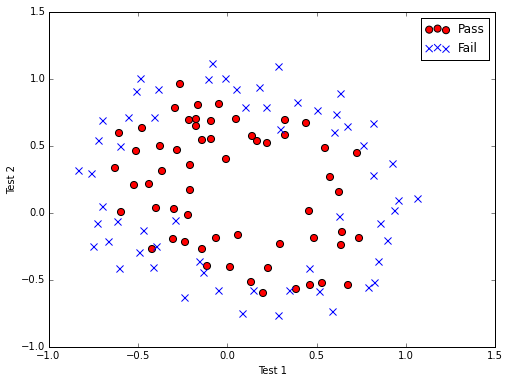

In [59]:
#Example of non-linearly separable decision boundary
positive = df[df["Pass"] == 1]
negative = df[df["Pass"] == 0]
plt.figure(figsize=(8, 6))
plt.scatter(positive.Test1, positive.Test2, s=50, c="r", marker = "o", label="Pass")
plt.scatter(negative.Test1, negative.Test2, s=50, marker = "x", label="Fail")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend()

In [61]:
degree = 5
x1 = df["Test1"]
x2 = df["Test2"]
df.insert(3, "Ones", 1)

for i in range(1, degree):
    for j in range(0, i):
        df["F" + str(i) + str(j)] = np.power(x1, i - j)*np.power(x2, j)
df.drop("Test1", axis=1, inplace=True)
df.drop("Test2", axis=1, inplace=True)
df.head()

,Pass,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [104]:
#cost function with regularization term with squared coefficients
def costReg(theta, X, y, lamb):
    theta, X, y = np.matrix(theta), np.matrix(X), np.matrix(y)
    m = float(len(y))
    first = np.multiply(-y, np.log(sigmoid(np.dot(X, theta.T))))
    second = np.multiply(1 - y, np.log(1 - sigmoid(np.dot(X, theta.T))))
    reg = lamb/(2.0 * m) * np.sum(np.power(theta[:, 1:theta.shape[1]], 2))
    return 1.0/m * np.sum(first - second) + reg

In [105]:
numcols = df.shape[1]
X2 = df.iloc[:, 1:numcols]
y2 = df.iloc[:, 0:1]
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(numcols - 1)
lamb = 1.0

In [106]:
costReg(theta2, X2, y2, lamb)

0.6931471805599454

In [107]:
def gradReg(theta, X, y, lamb=1.0):
    theta, X, y = np.matrix(theta), np.matrix(X), np.matrix(y)
    numParams = int(theta.ravel().shape[1]) #number of parameters
    grad = np.zeros(numParams)
    m = float(len(y)) #number of observations
    
    errors = sigmoid(np.dot(X, theta.T)) - y
    for i in xrange(numParams):
        if i == 0:   #intercept term is not regularized
            grad[i] = 1.0/m * np.sum(np.multiply(errors, X[:, i]))
        else:
            grad[i] = 1.0/m * np.sum(np.multiply(errors, X[:, i])) + lamb/m*theta[:, i] #include regularization
    return grad

In [108]:
gradReg(theta2, X2, y2, lamb)

array([ 0.00847458,  0.01878809,  0.05034464,  0.01150133,  0.01835599,
        0.00732393,  0.00819244,  0.03934862,  0.00223924,  0.01286005,
        0.00309594])

In [75]:
def gradientDescent(X, y, theta, alpha, iters, lamb):
    X, y, theta = np.matrix(X), np.matrix(y), np.matrix(theta)
    temp = np.matrix(np.zeros(theta.shape)) #starting values for weights
    numparams = int(theta.shape[1]) #number of features
    cost = []
    m = float(len(X))
    
    for i in xrange(iters):
        errors = np.dot(X, theta.T) - y #errors for each observation
        grad = gradReg(theta, X, y, lamb) #compute gradient
        for j in xrange(numparams):
            temp[0, j] = theta[0, j] - alpha * grad[j] #update for parameter number j
        cost.append(costReg(theta, X, y, lamb))
        theta = temp
    
    return theta, cost

In [111]:
theta2 = np.zeros(numcols - 1)
weights, costs = gradientDescent(X2, y2, theta2, 0.03, 5000, 1.0)
print weights
preds = predict(weights, X2)
correct = [1 if a == b else 0 for (a, b) in zip(preds, y2)]
print "Accuracy with gradient descent:", sum(correct)/float(len(y2))

[[ 0.50528434  0.26646386 -1.57104334 -0.51247508 -0.03751723 -0.2425343
  -0.32000072 -1.28296694 -0.00813326 -0.74849546 -0.02372785]]
Accuracy with gradient descent: 0.661016949153


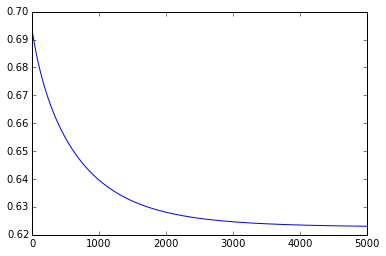

In [112]:
plt.plot(np.arange(len(costs)), costs)

In [103]:
#accuracy much lower on non-linearly separable data set as logistic regression cannot find a good linear decision boundary
theta2 = np.zeros(numcols - 1)
result2 = opt.fmin_tnc(func=costReg, x0 = theta2, fprime=gradReg, args=(X2, y2, 1.0))
print result2
preds = predict(np.matrix(result2[0]), X2)
correct = [1 if a == b else 0 for (a, b) in zip(preds, y2)]
print "Accuracy with gradient descent:", sum(correct)/float(len(y2))

(array([ 0.53010247,  0.29075567, -1.60725764, -0.58213819,  0.01781027,
       -0.21329508, -0.40024142, -1.3714414 ,  0.02264304, -0.9503358 ,
        0.0344085 ]), 22, 1)
Accuracy with gradient descent: 0.661016949153


In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
mod = LogisticRegression(penalty="l2", C=1.0)
mod.fit(X2, y2.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [99]:
mod.score(X2, y2)

0.66101694915254239